### Introduction to PCA

In this notebook, we will implement the PCA using only numpy to help us deeply understand PCA.

As well, we will demo how to use SKLearn API to use PCA in some use cases.

### Implementation PCA using numpy

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.random.seed(1) # random seed for consistency, debugging same results every time

### Init Data

In [5]:
#we'll first create 2 classes, each with 3 features
#create class 1 random sampled 3 X 20 data set
mu_vec1 = np.array([0,0,0])  # sample mean
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # sample covariance
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print(class1_sample)

#create class 2 random sampled 3 X 20 data set
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print(class2_sample)

[[-0.75439794 -0.29809284  1.13162939 -1.39649634  0.16003707 -2.02220122
   0.23009474 -0.20075807  0.19829972  0.37756379  1.19891788 -0.63873041
  -0.34385368  0.69803203  0.40349164  0.16938243 -0.26621851  0.31515939
   0.35054598 -1.61577235]
 [ 1.25286816  0.48851815  1.51981682 -1.44411381  0.87616892 -0.30620401
   0.76201118  0.18656139  0.11900865  0.12182127  0.18515642  0.42349435
   0.04359686 -0.44712856  0.59357852  0.74055645  0.03261455  0.84616065
  -1.31228341  1.12141771]
 [ 0.51292982 -0.07557171  2.18557541 -0.50446586  0.31563495  0.82797464
  -0.22232814  0.41005165 -0.67066229  1.12948391 -0.37528495  0.07734007
  -0.62000084  1.2245077  -1.09491185 -0.9537006  -1.37311732 -0.85951594
  -0.03869551  0.40890054]]
[[  9.75383044e-01   2.96710175e+00   2.62765075e+00   1.86334532e+00
   -2.30058136e-01   3.76469270e-01   1.80186103e+00   8.98254127e-01
    1.52946532e+00   1.61838026e+00   6.89883226e-01   3.18697965e+00
    8.63555256e-01  -1.22018729e-01   1.24

### Plot data

Populating the interactive namespace from numpy and matplotlib


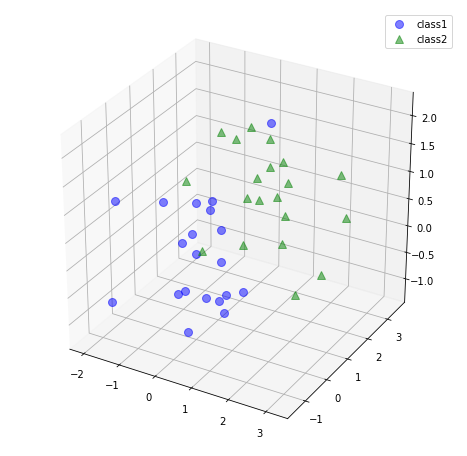

In [12]:
# plot samples
%pylab inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()


### Process data

In [14]:
# step 1. take the whole data set ignoring classes

#make it one big dataset
#3 x 40 still 3 features
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

In [15]:
# step 2. compute the d dimensional mean vector, to help compute covariance matrix

#mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3D mean vector
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print(mean_vector)

[[ 0.64163822]
 [ 0.62075309]
 [ 0.5691864 ]]


In [17]:
# step 3. compute the covariance matrix

#Variance is the degree by which a random vairable changes with respect to its expected value
#Covariance is the degree by which two different random variables change with respect to each other. 
#measures relationship between each feature

cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.42878673  0.21958437  0.40079966]
 [ 0.21958437  0.99831476  0.12632412]
 [ 0.40079966  0.12632412  1.01587488]]


In [18]:
# Step 4. computer eigenvectors and eigenvalues
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))

Eigenvector 1: 
[[-0.81100975]
 [-0.31639546]
 [-0.4920946 ]]
Eigenvalue 1 from scatter matrix: 1.7576444786339491
Eigenvector 2: 
[[-0.53005318]
 [ 0.04139469]
 [ 0.84695343]]
Eigenvalue 2 from scatter matrix: 0.7712144563639589
Eigenvector 3: 
[[ 0.24760212]
 [-0.94772379]
 [ 0.20127792]]
Eigenvalue 3 from scatter matrix: 0.9141174287508649


In [19]:
# step 5. sort eigenvector by decreasing value
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.75764447863
0.914117428751
0.771214456364


In [20]:
# step 5.2 choose k eigenvectos w largest eigenvalues to form d x k matrix
#k is 2 
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.81100975  0.24760212]
 [-0.31639546 -0.94772379]
 [-0.4920946   0.20127792]]


In [21]:
# step 6. use d x k to transform samples to new subspace
#dot product between orignal matrix and eigen pairs
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."


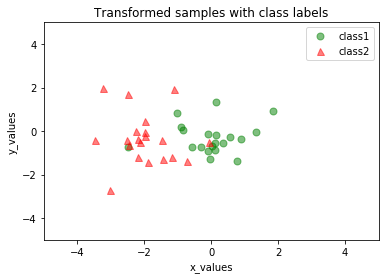

In [22]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

### PCA Example Using Sklearn

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [26]:
np.random.seed(5)

In [39]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Before PCA Number of Feature: ", X.shape[1])

Number of Feature:  4


In [41]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
print("After PCA Number of Feature: ", X.shape[1])

After PCA Number of Feature:  3


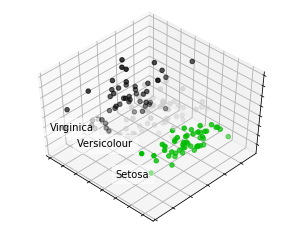

In [42]:
#plot the data in 3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Reference:

https://github.com/llSourcell/How_to_Simplify_Your_Data-LIVE-/blob/master/pca_notes.ipynb

http://setosa.io/ev/eigenvectors-and-eigenvalues/

https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/